# Week 7 - COS30049 Clustering & Classification

## 1 Recap of the Lecture Content (10mins)

1) The differences between Clustering and Classification
2) The differences between K-means and DBSCAN
3) The workflow of DBSCAN Algorithm
4) The workflow of Logistic Regression & KNN
5) The evaluation methods and metrics of Classification. 

## 2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### 2.1 DBSCAN Practice

In this workshop, we will learn how to implement DBSCAN using Python. We will go through the following steps:

1. **Introduction to DBSCAN**
2. **Data Processing using `make_moons` dataset**
3. **Implementing DBSCAN**
4. **Evaluating the Model**

**Step 1: Importing the Necessary Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


**Step 2: Data Preparation**

We'll use the make_moons dataset, which generates two interleaving half circles that are not linearly separable, perfect for testing DBSCAN.

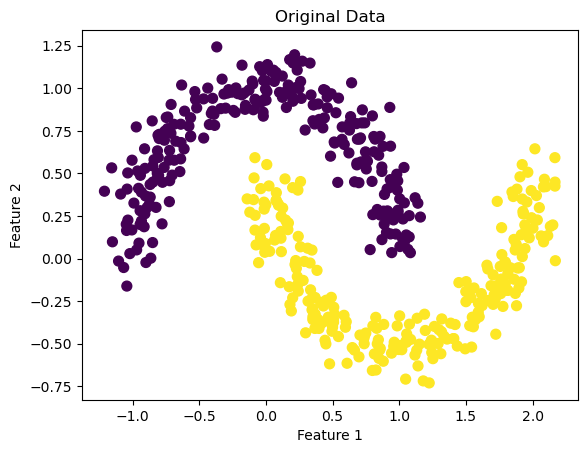

In [2]:
# Create the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Standardize the dataset for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Step 3: Implementing DBSCAN**

We now apply DBSCAN, a density-based clustering algorithm, which is capable of identifying clusters of arbitrary shapes.

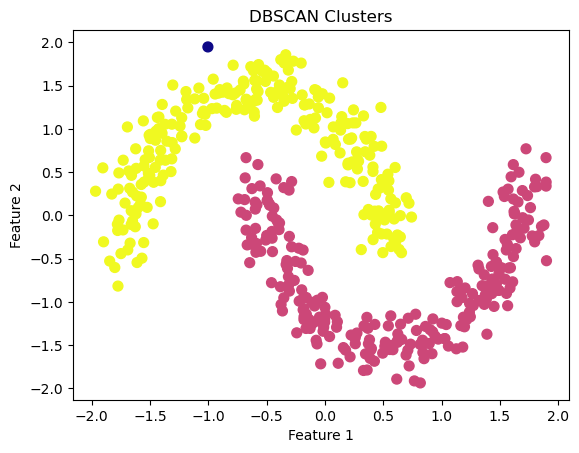

In [3]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# Get the labels
labels = dbscan.labels_

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma', s=50)
plt.title('DBSCAN Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Step 4: Evaluating the Model**

Evaluation in DBSCAN can be tricky since it doesn’t assume labels as k-means does. One method is using the silhouette score, which evaluates how well-separated the clusters are.

In [4]:
# Evaluate clustering using Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette_avg:.2f}')

# Identifying noise points (labeled as -1)
n_noise = np.sum(labels == -1)
print(f'Number of noise points: {n_noise}')


Silhouette Score: 0.16
Number of noise points: 1


**Summary**
 - We used the make_moons dataset, which contains two interleaving half circles.
 - We applied the DBSCAN algorithm, which is effective in detecting clusters of arbitrary shape.
 - We evaluated the model using the silhouette score and observed the number of noise points detected by DBSCAN.

### 2.2 Discussions of DBSCAN

**Discussion Question 1:**

How could DBSCAN be applied in your chosen assignment topic?

What features could you use?

What would the “noise points” (outliers) represent in your dataset?



**Discussion Question 2:**

What is one advantage of DBSCAN compared to K-Means in a cybersecurity context?


### 2.3 Direction: DBSCAN in Cybersecurity

Unlike K-Means, DBSCAN does not require you to predefine the number of clusters.  
It automatically finds **dense regions** (representing common patterns) and labels **outliers** as noise.  

In cybersecurity tasks, these outliers often correspond to **potential threats or abnormal behaviors**, such as suspicious posts, unusual files, risky code snippets, or anomalous network flows.  


## 3 Logistic Regression and K-Nearest Neighbors (KNN)

In this workshop, we will explore two classification algorithms: Logistic Regression and KNN. We will use the following steps:

1. **Introduction to Logistic Regression and KNN**

2. **Data Processing using `breast_cancer` dataset**

3. **Implementing Logistic Regression**

4. **Implementing KNN**

5. **Model Evaluation (Precision, Accuracy, F1-Score, Recall)**


### 3.1 Classification Practice


**Step 1: Importing the Necessary Libraries**

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


**Step 2: Data Preparation**

We'll use the breast_cancer dataset, which is a binary classification dataset containing features related to breast cancer diagnosis.

In [7]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 3: Implementing Logistic Regression**

In [18]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)


**Step 4: Implementing KNN**

In [9]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)


**Step 5: Model Evaluation (Precision, Accuracy, F1-Score, Recall)**

Now, we will evaluate both models using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

Logistic Regression Evaluation

In [10]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.97
Precision: 0.97
Recall: 0.99
F1-Score: 0.98

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



KNN Evaluation

In [12]:
print("KNN Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Evaluation:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Confusion Matrix:
[[40  3]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



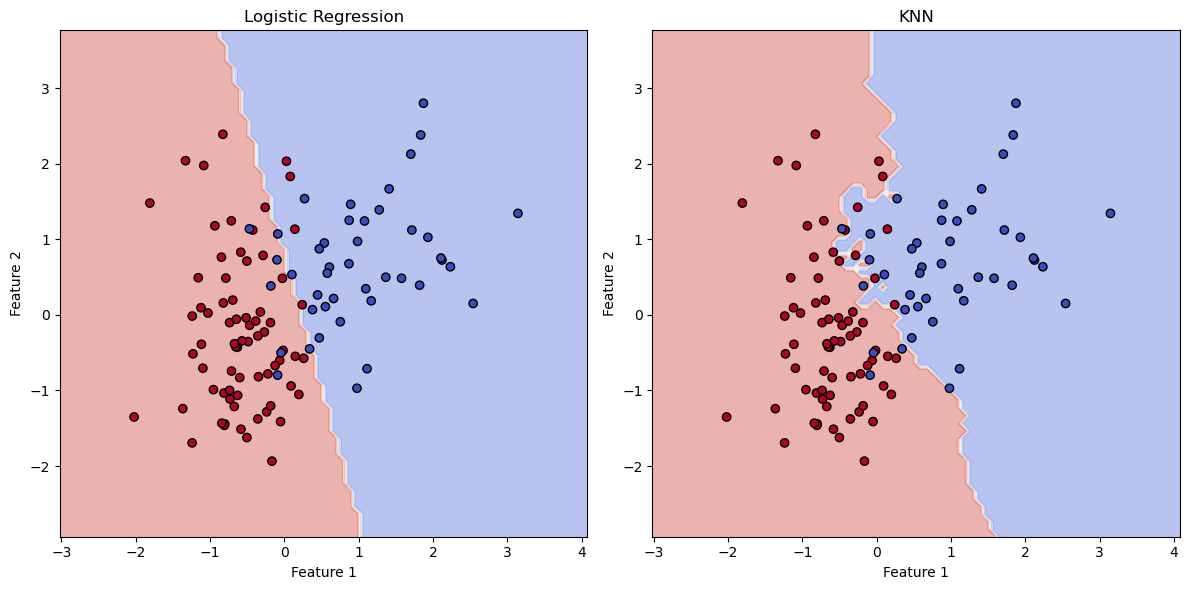

In [ ]:
# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classes over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting for Logistic Regression and KNN
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Using only the first two features for visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train models again using only the first two features for visualization
log_reg_2D = LogisticRegression(random_state=42)
log_reg_2D.fit(X_train_2D, y_train)

knn_2D = KNeighborsClassifier(n_neighbors=5)
knn_2D.fit(X_train_2D, y_train)

# Plot Logistic Regression decision boundary
plot_decision_boundary(log_reg_2D, X_test_2D, y_test, ax[0], "Logistic Regression")

# Plot KNN decision boundary
plot_decision_boundary(knn_2D, X_test_2D, y_test, ax[1], "KNN")

plt.tight_layout()
plt.show()


### Summary:
We used the breast_cancer dataset to predict cancer diagnosis using two algorithms: Logistic Regression and KNN.
We trained both models and evaluated them using key metrics such as accuracy, precision, recall, F1-score, and confusion matrix.
You can experiment with different K-values in KNN or modify the parameters of Logistic Regression to see their effects on model performance.

### 3.2 Discussions

**Discussion Question:**  
What features from your own topics could you use to train a Logistic Regression model or KNN? How would the model help you on your topic?


### 3.3 Direction: Why Logistic Regression and KNN matter in Security

Both Logistic Regression and K-Nearest Neighbors (KNN) are **classification algorithms**.  
In cybersecurity, classification is central: we often need to decide whether something is **benign or malicious**, such as a message, a file, a piece of code, or a network flow.

- **Logistic Regression**: provides a probability-based decision boundary, helping to interpret how different features contribute to the final prediction.  
- **KNN**: classifies based on similarity to past examples, useful when the decision boundary is complex or non-linear.  

These methods map directly onto your assignment topics.


## 4 Additional Parts

Next, we will give some additional models here to help you choose and learn more. 

Note: This part is not for the workshop, you can choose to learn them or not, because these kinds of models are a little hard for AI beginners.

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree
from sklearn.ensemble import RandomForestClassifier  # For Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Decision Tree and Random Forest
decision_tree = DecisionTreeClassifier(random_state=42)  # Decision Tree
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest

# Train both models
decision_tree.fit(X_train_scaled, y_train)  # Train Decision Tree
random_forest.fit(X_train_scaled, y_train)  # Train Random Forest

# Predict with both models
y_pred_dt = decision_tree.predict(X_test_scaled)  # Predict with Decision Tree
y_pred_rf = random_forest.predict(X_test_scaled)  # Predict with Random Forest

# Function for evaluation
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print('-'*50)

# Evaluate Decision Tree and Random Forest
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Decision Tree Evaluation:
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Confusion Matrix:
[[40  3]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

--------------------------------------------------


In [15]:
evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1-Score: 0.97

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

--------------------------------------------------


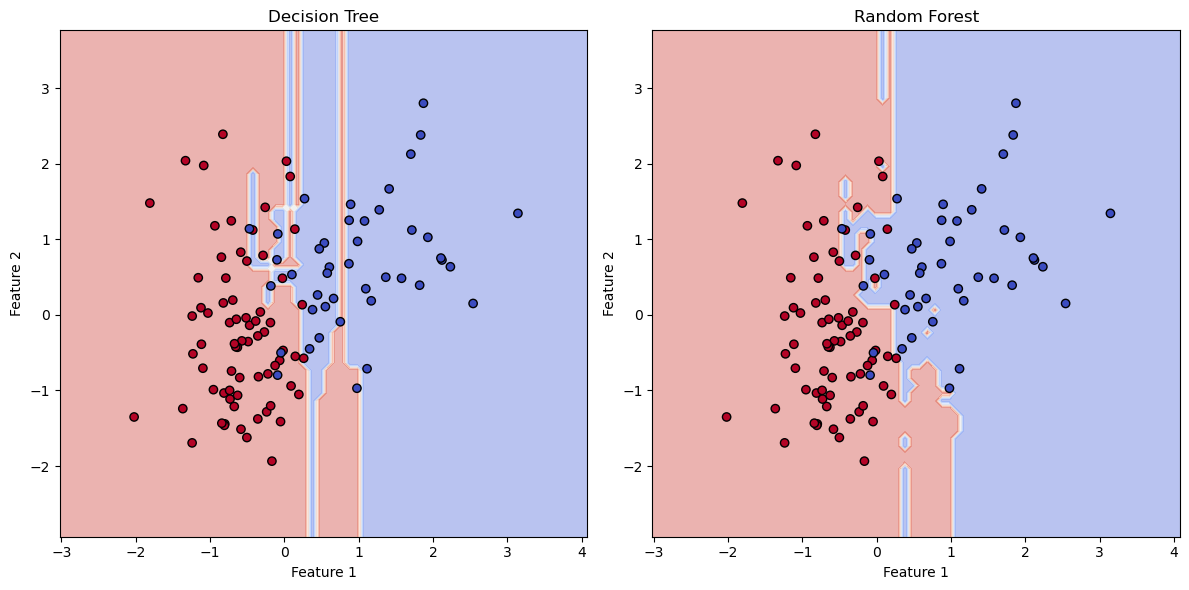

In [17]:
# Visualization: Decision Tree and Random Forest (using 2D for simplicity)
# Function to plot the decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    # Create mesh grid for the first two features
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict classes over the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plotting for Decision Tree and Random Forest
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Using only the first two features for visualization
X_train_2D = X_train_scaled[:, :2]
X_test_2D = X_test_scaled[:, :2]

# Train models again using only the first two features for visualization
decision_tree_2D = DecisionTreeClassifier(random_state=42)
decision_tree_2D.fit(X_train_2D, y_train)

random_forest_2D = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_2D.fit(X_train_2D, y_train)

# Plot Decision Tree decision boundary
plot_decision_boundary(decision_tree_2D, X_test_2D, y_test, ax[0], "Decision Tree")

# Plot Random Forest decision boundary
plot_decision_boundary(random_forest_2D, X_test_2D, y_test, ax[1], "Random Forest")

plt.tight_layout()
plt.show()
